In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import RandomizedSearchCV

In [26]:
import pandas as pd
data3 = pd.read_csv("D:/regression_project/Cab-Weather Data/Cab_price_cleaned")
cab_price = data3.copy()

In [27]:
cab_price.head()

,distance_km,company,drop_location,pickup_location,price,surge,ride_type,temperature,cloud_coverage,pressure,rainfall,humidity,wind_speed,hour,day,month,weekday,weekend
0,0.44,Lyft,North Station,Haymarket Square,5.0,1.0,Shared,38.46,0.29,1022.25,0.0000,0.76,7.68,9,16,12,6,1
1,0.44,Lyft,North Station,Haymarket Square,11.0,1.0,Lux,44.31,1.00,1003.17,0.1123,0.90,13.69,2,27,11,1,0
2,0.44,Lyft,North Station,Haymarket Square,7.0,1.0,Lyft,44.31,1.00,1003.17,0.0000,0.90,13.69,1,28,11,2,0
3,0.44,Lyft,North Station,Haymarket Square,26.0,1.0,Lux Black XL,35.08,0.00,1013.71,0.0000,0.70,5.25,4,30,11,4,0
4,0.44,Lyft,North Station,Haymarket Square,9.0,1.0,Lyft XL,37.58,0.42,998.64,0.0000,0.71,11.30,3,29,11,3,0


In [28]:
print(cab_price['company'].unique())
print(cab_price['ride_type'].unique())
print(cab_price['pickup_location'].unique())
print(cab_price['drop_location'].unique())


['Lyft' 'Uber']
['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL'
 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool']
['Haymarket Square' 'Back Bay' 'North End' 'North Station' 'Beacon Hill'
 'Boston University' 'Fenway' 'South Station' 'Theatre District'
 'West End' 'Financial District' 'Northeastern University']
['North Station' 'Northeastern University' 'West End' 'Haymarket Square'
 'South Station' 'Fenway' 'Theatre District' 'Beacon Hill' 'Back Bay'
 'North End' 'Financial District' 'Boston University']


In [29]:
# categorical data into numeric:
cat_col = cab_price.select_dtypes(include=['object'])
cat_col

,company,drop_location,pickup_location,ride_type
0,Lyft,North Station,Haymarket Square,Shared
1,Lyft,North Station,Haymarket Square,Lux
2,Lyft,North Station,Haymarket Square,Lyft
3,Lyft,North Station,Haymarket Square,Lux Black XL
4,Lyft,North Station,Haymarket Square,Lyft XL
...,...,...,...,...
637971,Uber,North End,West End,WAV
637972,Uber,North End,West End,UberXL
637973,Uber,North End,West End,UberX
637974,Uber,North End,West End,Black SUV


In [30]:
# Changing categorical data into encoded formet:

le = LabelEncoder()
c_cols = ['company','ride_type']

for col in c_cols:
    cab_price[col] = le.fit_transform(cab_price[col])

cab_price = pd.get_dummies(data=cab_price,
                           columns=['pickup_location','drop_location'],
                           drop_first=True).astype(int)


In [31]:
print(cab_price['company'].unique())
print(cab_price['ride_type'].unique())
print(dict(zip(le.classes_,le.transform(le.classes_))))


[0 1]
[ 7  2  5  4  6  3 10  0  9 11  1  8]
{'Black': np.int64(0), 'Black SUV': np.int64(1), 'Lux': np.int64(2), 'Lux Black': np.int64(3), 'Lux Black XL': np.int64(4), 'Lyft': np.int64(5), 'Lyft XL': np.int64(6), 'Shared': np.int64(7), 'UberPool': np.int64(8), 'UberX': np.int64(9), 'UberXL': np.int64(10), 'WAV': np.int64(11)}


In [32]:
cab_price['pickup_location_South Station']

0         0
1         0
2         0
3         0
4         0
         ..
637971    0
637972    0
637973    0
637974    0
637975    0
Name: pickup_location_South Station, Length: 637976, dtype: int64

In [34]:
# Spliting train and test data:

X = cab_price.drop(columns=['price'])
y = cab_price['price']

X_train,X_test,y_train,y_test = \
               train_test_split(X,y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(510380, 37)

In [11]:
X_test.shape

(127596, 37)

In [12]:
# Randomforest-regression:
model = RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42
)

model = model.fit(X_train,y_train)

In [78]:
#Predict test accuracy randomforest:
y_pred = model.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_rf_test = r2_score(y_test, y_pred)
print("r2_rf_test:",r2_rf_test)


MAE : 1.3324067318815924
RMSE: 2.2620280128431993
r2_rf_test: 0.9409657066066259


In [79]:
# Predict train accuracy randomforest:
y_train_pred = model.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2_rf_train = r2_score(y_train, y_train_pred)
print("r2_rf_train:",r2_rf_train)


MAE : 1.2602756064208938
RMSE: 2.1193048850842873
r2_rf_train: 0.9480097492122821


In [82]:
# Comparing random forest train and test accuracy:

diff_train_test_rf = (r2_rf_train)-(r2_rf_test)
diff_train_test_rf

0.0070440426056561645

In [16]:
#Xgboost-regressor:
xgb = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb = xgb.fit(X_train,y_train)

In [84]:
# Predict XGBoost test:
y_pred = xgb.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_xgb_test = r2_score(y_test, y_pred)
print("r2_xgb_test:",r2_xgb_test)


MAE : 1.3104077577590942
RMSE: 2.2043351982120734
r2_xgb_test: 0.9439386129379272


In [85]:
# Predict XGBoost train:
y_pred = xgb.predict(X_train)

print("MAE:",mean_absolute_error(y_train, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_pred)))
r2_xgb_train = r2_score(y_train, y_pred)
print("r2_xgb_train:",r2_xgb_train)



MAE: 1.2678955793380737
RMSE: 2.121985822207792
r2_xgb_train: 0.9478781223297119


In [86]:
# Comparing XGBOOST test and train accuracy:
diif_train_test_xgb = (r2_xgb_train)-(r2_xgb_test)
diif_train_test_xgb

0.003939509391784668

In [20]:
# Predict train accuracy XGBOOST:
y_train_pred = xgb.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_train_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2  :", r2_score(y_train, y_train_pred))


MAE : 1.3473243713378906
RMSE: 2.2615189801738937
R2  : 0.9407981038093567


In [21]:
# Cross-validation for xgb:
cv_scores_xgb = cross_val_score(xgb,
                                X_train,
                                y_train,
                                cv=3,
                                scoring='r2',
                                n_jobs=-1)
print(f"CV SCORES-XGB : { cv_scores_xgb}")
print("---------------------")
print(f"CV Mean R2: {np.mean(cv_scores_xgb):.3f} "
      f"CV STD MEAN: {np.std(cv_scores_xgb):.3f}")


In [22]:
#Cross validation for random forest:
cv_scores_rf = cross_val_score(model,
                               X_train,
                               y_train,
                               cv=3,
                               scoring='r2'
                               )
print(f"CV SCORES-RF : {cv_scores_rf}")
print("---------------------")
print(f"CV Mean R2: {np.mean(cv_scores_rf):.3f} "
      f"CV STD MEAN: {np.std(cv_scores_rf):.3f}")


In [23]:
# Validation for Xgboost:
param_range = [50, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    estimator=XGBRegressor(
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    X=X_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean, label="Train Score")
plt.plot(param_range, test_mean, label="Validation Score")
plt.title("Validation Curve - n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()


In [24]:
# Validation for randomforest:
param_range = [50, 100, 200, 300, 400]

train_scores, test_scores = validation_curve(
    estimator=  RandomForestRegressor(
    n_estimators=100,
    max_depth=15,
    min_samples_split=10,
    n_jobs=-1,
    random_state=42

    ),
    X=X_train,
    y=y_train,
    param_name="n_estimators",
    param_range=param_range,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(10,6))
plt.plot(param_range, train_mean, label="Train Score")
plt.plot(param_range, test_mean, label="Validation Score")
plt.title("Validation Curve - n_estimators")
plt.xlabel("n_estimators")
plt.ylabel("R² Score")
plt.legend()
plt.grid()
plt.show()


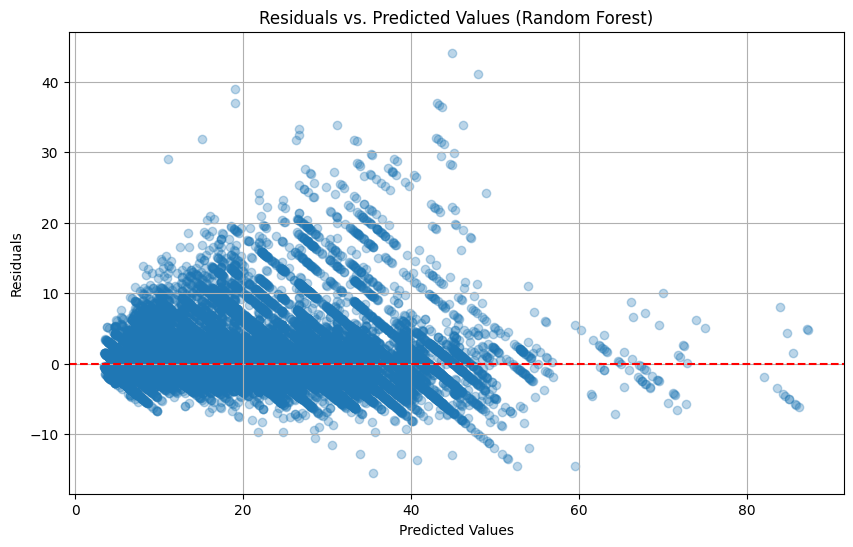

In [88]:
# Calculate residuals for the Random Forest model
rf_residuals = y_test - model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(model.predict(X_test), rf_residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Random Forest)')
plt.grid(True)
plt.show()


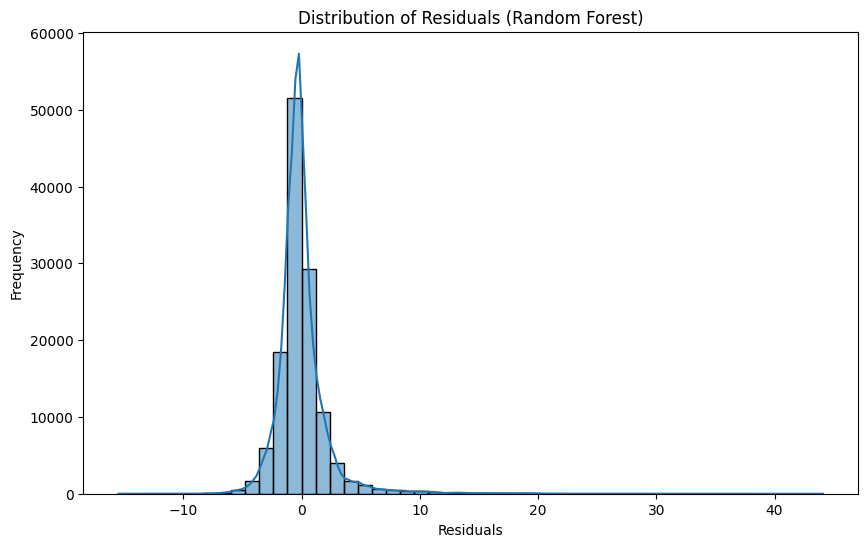

In [89]:
# Plot histogram of residuals for Random Forest
plt.figure(figsize=(10, 6))
sns.histplot(rf_residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (Random Forest)')
plt.show()


In [96]:

rf = RandomForestRegressor(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}



rf_random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=rf_param_grid,
    cv = 3,
    scoring = 'r2',
    verbose=2,
    n_jobs=1,
    n_iter=10,
    random_state=42
)

rf_random_search.fit(X_train, y_train)


print("Best parameters:", rf_random_search.best_params_)
print("Best score:", rf_random_search.best_score_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time= 1.2min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 5.3min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 5.1min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time= 5.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=  30.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=2, n_estim

In [99]:
# Best model for randomforest test accuracy:

best_rf = rf_random_search.best_estimator_

y_pred_rf = best_rf.predict(X_test)

r2_best_test_rf = r2_score(y_test, y_pred_rf)
print("r2_best_test_rf:",r2_best_test_rf)
print("mae_best_test_rf:",mean_absolute_error(y_test, y_pred_rf))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_rf)))


r2_best_test_rf: 0.9280466539612848
mae_best_test_rf: 1.5775762046369122
RMSE: 2.4973033029778846


In [100]:
# Best model for randomforest train acuuracy:

y_pred_train_rf = xgb_best.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_pred_train_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train_rf)))

r2_best_train_rf = r2_score(y_train,y_pred_train)
print("r2_best_train_rf : ", r2_best_train_rf)

MAE : 1.2678955793380737
RMSE: 2.121985822207792
r2_best_train_rf :  0.9478781223297119


In [101]:
# Best model for randomforest diff of train and test:
diff_train_test_rf = r2_best_train_rf-r2_best_test_rf
diff_train_test_rf

0.019831468368427085

In [28]:
xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [200, 300, 500, 800, 1000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8, 10],
    'subsample': [0.6, 0.7, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [1, 2, 5, 10]
}

xgb_random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_grid,
    n_iter=10,
    cv=3,
    scoring='r2',
    verbose=2,
    n_jobs=-1
  )

xgb_random_search.fit(X_train, y_train)

print("Best Parameters:", xgb_random_search.best_params_)
print("Best Score:", xgb_random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'subsample': 0.8, 'reg_lambda': 5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 8, 'learning_rate': 0.2, 'gamma': 5, 'colsample_bytree': 0.6}
Best Score: 0.9425198833147684


In [60]:
# XGBOOST BEST MODEL :
xgb_best = XGBRegressor(
    n_estimators=300,
    learning_rate=0.2,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.6,
    random_state=42,
    reg_lambda=5,
    n_jobs=-1,
    reg_alpha=0.5,
    gamma=5
)

xgb_best = xgb_best.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=5, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=300,
             n_jobs=-1, num_parallel_tree=None, ...)

In [70]:
# Best model train
y_pred_train = xgb_best.predict(X_train)

print("MAE :", mean_absolute_error(y_train ,y_pred_train))
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))

r2_best_train = r2_score(y_train,y_pred_train)
print("r2_best_train : ", r2_best_train)

MAE : 1.2678955793380737
RMSE: 2.121985822207792
r2_best_train :  0.9478781223297119


In [71]:
# best model predict:

y_pred = xgb_best.predict(X_test)

print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
r2_best_test = r2_score(y_test, y_pred)
print("r2_best_test  :", r2_best_test)

MAE : 1.3104077577590942
RMSE: 2.2043351982120734
r2_best_test  : 0.9439386129379272


In [72]:
# XGBOOST best model train and test diff:
diff_train_test_best = r2_best_train-r2_best_test
diff_train_test_best

0.003939509391784668

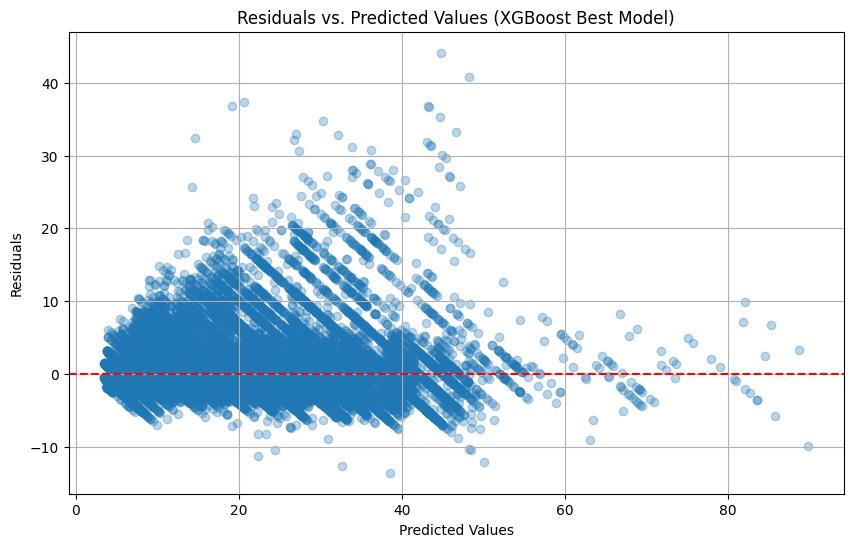

In [107]:
# Calculate residuals for the best XGBoost model
residuals = y_test - xgb_best.predict(X_test)


plt.figure(figsize=(10, 6))
plt.scatter(xgb_best.predict(X_test), residuals, alpha=0.3)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (XGBoost Best Model)')
plt.grid(True)
plt.show()

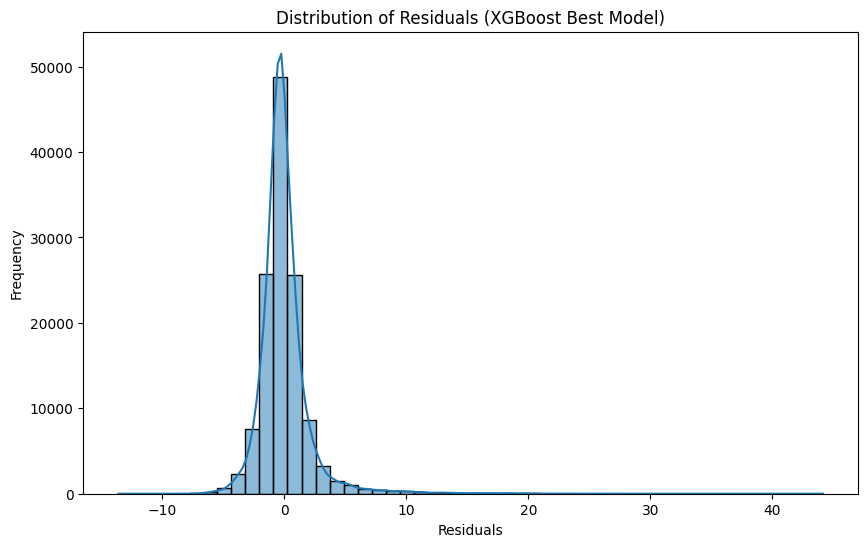

In [108]:
# Plot histogram of residuals for the best XGBoost model
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals (XGBoost Best Model)')
plt.show()

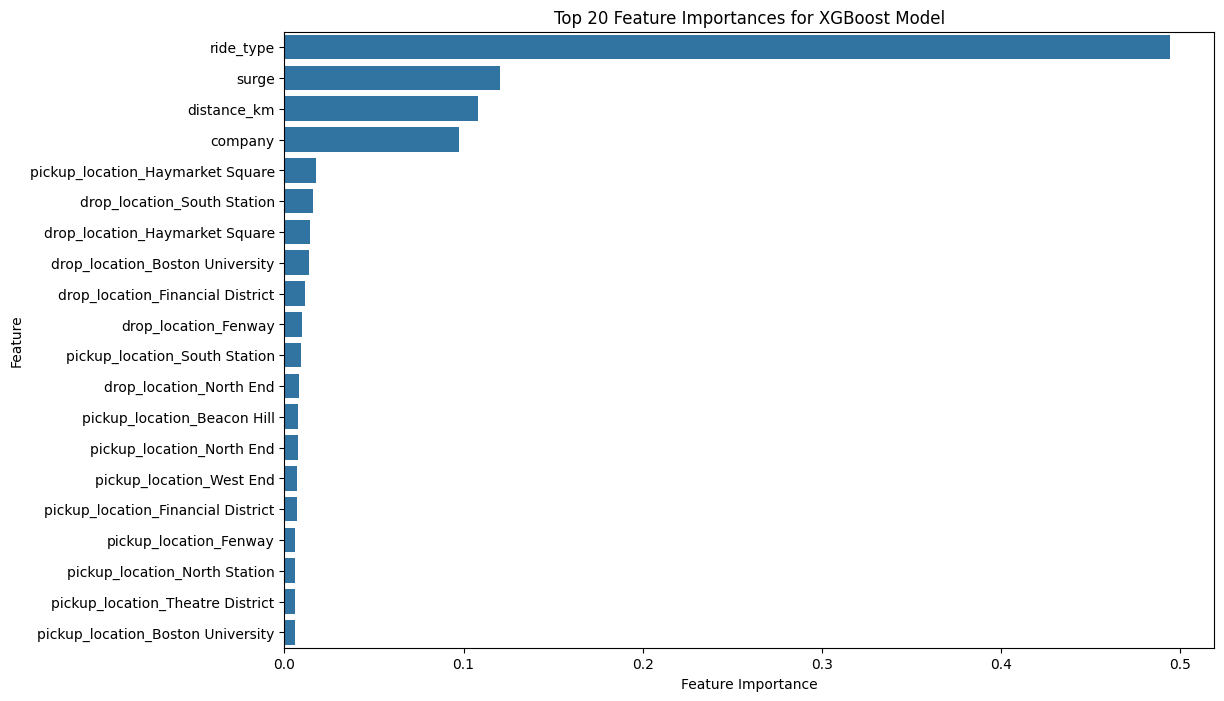

In [52]:

# Get feature importances from the best XGBoost model

feature_importances = xgb_best.feature_importances_
features = X_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances for XGBoost Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

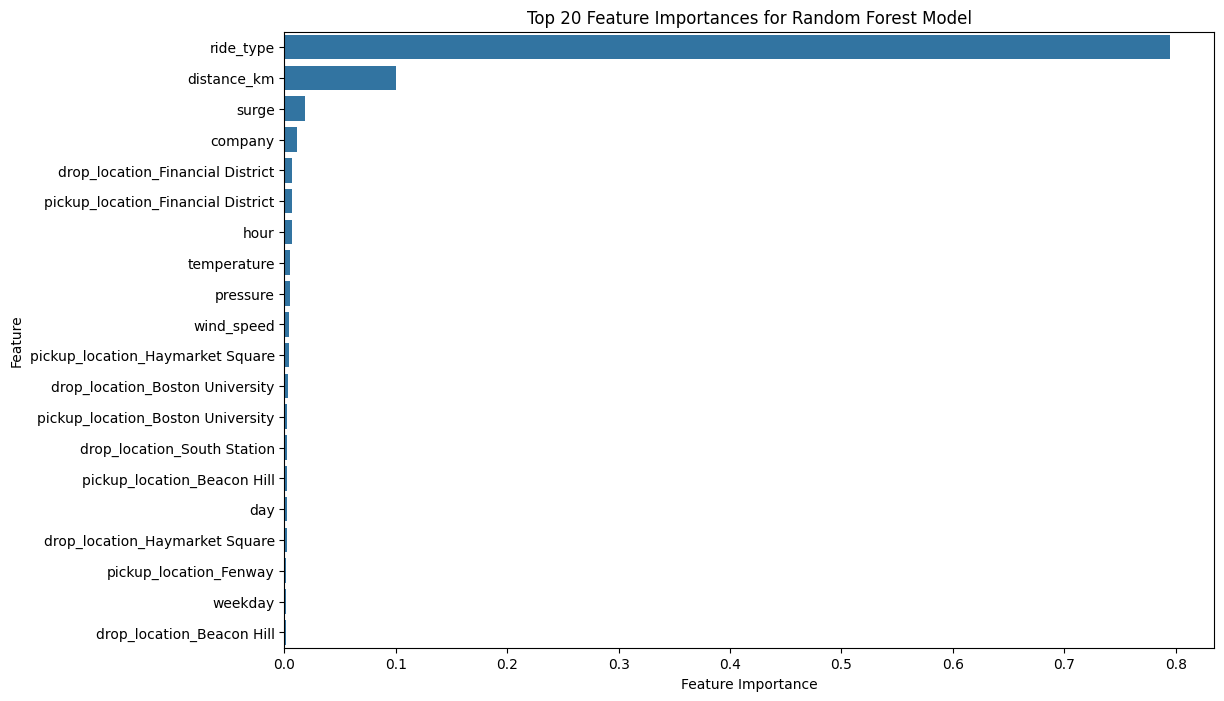

In [102]:
# Get important feature from randomforest:

rf_feature_importances = best_rf.feature_importances_

rf_features = X_train.columns
rf_importance_df = pd.DataFrame({'Feature': rf_features, 'Importance': rf_feature_importances})
rf_importance_df = rf_importance_df.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(20))
plt.title('Top 20 Feature Importances for Random Forest Model')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

### Final Model Comparison and Recommendation

Based on the evaluation of all three models, here's a summary of their performance:

| Model                               | Test R2 Score | Difference (Train - Test R2) |
| :---------------------------------- | :------------ | :--------------------------- |
| Random Forest Regressor             | 0.94096       | 0.00704                      |
| Random Forest (Tuned)      | 0.92804       |0.019831                     |    
| XGBoost Regressor (Initial)         | 0.94394       | 0.00394                      |
| XGBoost Regressor (Tuned)| 0.94394       | 0.00394    
                

**Conclusion:**

The **XGBoost Regressor (after hyperparameter tuning)** is the best model for deployment.

While the initial XGBoost model already performed very well, the hyperparameter tuning process confirmed its robust performance. It offers:

1.  **Highest Predictive Accuracy:** A slightly higher R2 score on the test set (0.94394) compared to the Random Forest model (0.94096), indicating better predictive power.
2.  **Better Generalization:** A smaller difference between the train and test R2 scores (0.00394) suggests that it generalizes better to unseen data and is less prone to overfitting than the Random Forest model (0.00704).

Therefore, the tuned XGBoost model offers the best balance of accuracy and generalization for predicting cab prices.

In [109]:
# Saving model in a file :
import joblib
joblib.dump(xgb_best, "xgb_best_model.joblib")



['xgb_best_model.joblib']